In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime

In [24]:
#import Manaus.csv
df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

#pega o tamanho do data para filtrar a data posteriormente
size = df.size

#filtra somente os casos onde a coclusão é igual a recuperado
df_recovered = df.loc[df['_conclusao'] == 'Recuperado']

C:\Users\luizf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
#obtem somente as colunas _dt_notificacao e _conclusao
date_notification = df_recovered.filter(items=['_dt_notificacao', '_conclusao'])
date_notification

,_dt_notificacao,_conclusao
3,25/04/2020,Recuperado
5,04/05/2020,Recuperado
7,18/04/2020,Recuperado
10,28/04/2020,Recuperado
12,23/04/2020,Recuperado
...,...,...
113525,25/05/2020,Recuperado
113526,04/05/2020,Recuperado
113527,05/06/2020,Recuperado
113529,03/04/2020,Recuperado


In [26]:
#agora somente a coluna _dt_notificação
date_notification = df_recovered.filter(items=['_dt_notificacao'])
date_notification

,_dt_notificacao
3,25/04/2020
5,04/05/2020
7,18/04/2020
10,28/04/2020
12,23/04/2020
...,...
113525,25/05/2020
113526,04/05/2020
113527,05/06/2020
113529,03/04/2020


In [27]:
#função que vai filtrar todos os casos entre a partir de 03/08
def verifica_data(data):
    d = int(data[0:2])
    m = int(data[3:5])
    y = int(data[6:])
    
    data = datetime.date(y, m, d)
    often10days  = datetime.date(2020, 8, 3)
    
    return often10days<=data

for i in range (size):
    try:
        if(not(verifica_data(date_notification['_dt_notificacao'][i]))):
            date_notification['_dt_notificacao'][i] = 'Invalido'
    except:
        continue
        
new_date_notification = date_notification.loc[date_notification['_dt_notificacao'] != 'Invalido']

new_date_notification

,_dt_notificacao


In [97]:
order = new_date_notification['_dt_notificacao'].value_counts()
order

27/05/2020    1557
28/05/2020    1417
12/05/2020    1322
16/06/2020    1290
20/05/2020    1281
              ... 
06/01/2020       1
12/01/2020       1
01/02/2020       1
24/01/2020       1
16/01/2020       1
Name: _dt_notificacao, Length: 185, dtype: int64

In [98]:
date = order.index
case = order.values

list_of_tuples = list(zip(date, case))
date_of_case = pd.DataFrame(list_of_tuples, columns = ['Datas', 'Casos'])

date_of_case

,Datas,Casos
0,27/05/2020,1557
1,28/05/2020,1417
2,12/05/2020,1322
3,16/06/2020,1290
4,20/05/2020,1281
...,...,...
180,06/01/2020,1
181,12/01/2020,1
182,01/02/2020,1
183,24/01/2020,1


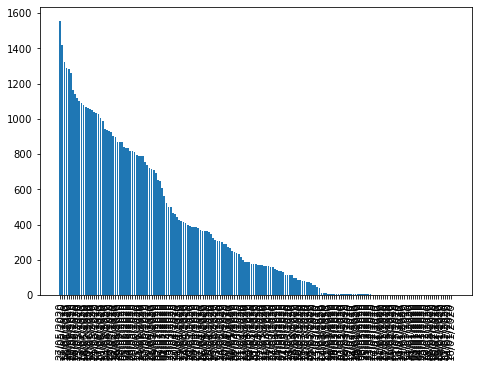

In [99]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(date_of_case['Datas'], date_of_case['Casos'])


plt.xticks(date_of_case['Datas'], rotation=90)
plt.show()